In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cavsim
from cavsim import Measure
from cavsim.connectors import BaseConnector, Connector
from cavsim.channels import ImportChannel, ExportChannel
from cavsim.components import BaseComponent, Component
from cavsim.solvers import BaseSolver, SimpleSolver
from cavsim.fluids import Fluid

In [3]:
from cavsim.pipes.pipe import Pipe
from cavsim.boundaries.left_boundary_pressure import LeftBoundaryPressure
from cavsim.boundaries.left_boundary_velocity import LeftBoundaryVelocity
from cavsim.boundaries.right_boundary_pressure import RightBoundaryPressure
from cavsim.boundaries.right_boundary_velocity import RightBoundaryVelocity
from cavsim.boundaries.simple_pipe_connector import PipeConnectorSimple
from cavsim.boundaries.zeta_joint import ZetaJoint
from cavsim.boundaries.simple_t_joint import SimpleTJoint
from cavsim.boundaries.simple_right_gasdampener import RightGasBubbleSimple
from cavsim.boundaries.frictionless_gasdampener import FrictionlessGasDampener

In [4]:
fluid = Fluid(1000, 1e-3, 2.08e9, 2.3e-3, initial_pressure=128000.0)

In [5]:
pipe = Pipe(0.065, 3.063, 0.002, 2e11, 1e-7, 7)
pipe1 = Pipe(0.065, 2.128, 0.002, 2e11, 1e-7, 7)

In [6]:
lb = LeftBoundaryPressure(128000.0)
pipe.connect(lb)

In [7]:
def pump(time):
    return -0.11 * np.minimum(np.sin(1 * time * 2.0 * np.pi), 0.0)
    #return  0

In [8]:
def step(time):
    return 0.35 * (time > 0.25)

In [9]:
rb = RightBoundaryVelocity(pump)
pipe1.connect(rb)

In [10]:
dampener = FrictionlessGasDampener(128000.0, 7.9e-4, 1.22)
pipe.connect(dampener)
pipe1.connect(dampener)
#conn = ZetaJoint(0.1)
#pipe.connect(conn)
#pipe1.connect(conn)

In [11]:
plogs = []
vlogs = []
plogs1 = []
vlogs1 = []
flogs = []
rblogs = []
relogs = []
def logging():
    plogs.append(pipe.field_wide_slice('pressure', 0) + 0.0)
    plogs1.append(pipe1.field_wide_slice('pressure', 0) + 0.0)
    vlogs.append(pipe.field_wide_slice('velocity', 0) + 0.0)
    vlogs1.append(pipe1.field_wide_slice('velocity', 0) + 0.0)
    flogs.append(pipe.field_wide_slice('friction_steady', 0) + 0.0)
    rblogs.append(rb._velocity[0,1])
    relogs.append(pipe.field_wide_slice('reynolds', 0) + 0.0)

In [12]:
solver = SimpleSolver()
solver.fluid = fluid
solver.seeds = [pipe, pipe1]
solver._callback = logging

In [13]:
solver.solve(1e20, 15.0, 3)

 0:00:00 [                              |  0.12%]  0:02:29  Currently at time   0.018 of  15.000

l:\cavsim\cavsim\base\solvers\simple_solver.py:46: UserWarning: Smaller timestep required by component! (0.0003070813201979946 < 1e+20 by <cavsim.pipes.pipe.Pipe object at 0x000001B06D161080>)
  warn('Smaller timestep required by component! ({} < {} by {})'.format(component_time, delta_t, component))
l:\cavsim\cavsim\base\solvers\simple_solver.py:46: UserWarning: Smaller timestep required by component! (0.00021334281729720292 < 1e+20 by <cavsim.pipes.pipe.Pipe object at 0x000001B06D1610F0>)
  warn('Smaller timestep required by component! ({} < {} by {})'.format(component_time, delta_t, component))


 0:02:40 [==============================|100.00%]  0:00:00  Currently at time  15.000 of  15.000

In [16]:
pfield = np.stack(plogs)
vfield = np.stack(vlogs)
pfield1 = np.stack(plogs1)
vfield1 = np.stack(vlogs1)
ffield = np.stack(flogs)
rbfield = np.stack(rblogs)
refield = np.stack(relogs)

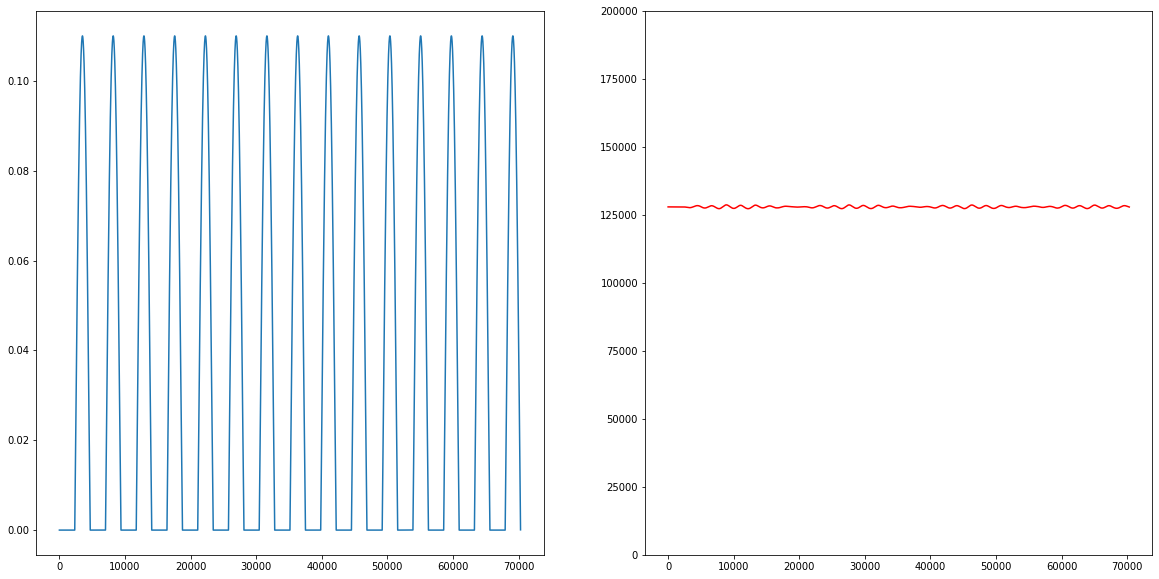

In [17]:
plt.figure(figsize=(20, 10))
val = -1
#val = -1
plt.subplot(1, 2, 1)
plt.plot(vfield1[:val,-1])
plt.subplot(1, 2, 2)
plt.plot(pfield[:val,1], color='red')
plt.ylim(0e5, 2e5)
plt.show()